Scroll to bottom to see eda conclusion and model implementation

In [535]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
pd.set_option('display.max_columns', 200)
plt.style.use('dark_background')

In [536]:
df = pd.read_csv(r"./train.csv")
df1 = df.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [537]:
df[df['Age'].isna()]['Survived'].value_counts()

Survived
0    125
1     52
Name: count, dtype: int64

In [538]:
df.groupby(['Sex','Survived'])['Age'].mean()

Sex     Survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: Age, dtype: float64

In [539]:
df_noage = df[df['Age'].isna()]
df1 = df_noage[df_noage['Survived']==1]
pd.crosstab(df1['Embarked'],df['Pclass'])

Pclass,1,2,3
Embarked,,,
C,6,1,7
Q,0,1,21
S,8,2,6


In [540]:
df[df['Survived']==0]['Age'].mean()

30.62617924528302

In [541]:
#df.loc[(df['Survived']==1) & (df['Sex']=='female'),'Age'].mean()

In [542]:
#df.loc[(df['Pclass']==1) & (df['Survived']==1) & (df['Sex']=='male'),'Age'].mean()

In [543]:
#df.loc[(df['Pclass']!=1) & (df['Survived']==1) & (df['Sex']=='male'),'Age'].mean()

In [544]:
df.shape

(891, 12)

In [545]:
df['Cabin'] = np.where(df['Cabin'].isna(),'Missing',df['Cabin'])

In [546]:
df['Age_Group'] = np.where(df['Age']<18,'Minor','Adult')

In [547]:
#df.loc[(df['Sex'] == 'male') & (df['Age'].isna()) & (df['Pclass']==1), 'Age'] = 35.25
#df.loc[(df['Sex'] == 'male') & (df['Age'].isna()) & (df['Pclass']!=1), 'Age'] = 20.5
#df.loc[(df['Sex'] == 'female') & (df['Age'].isna()), 'Age'] = 28.85

In [548]:
df['Age']=df['Age'].fillna(value=30.4)

In [549]:
df=df.drop(columns=['PassengerId'])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,Adult


In [550]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [551]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [552]:
df['Deck'] = df['Cabin'].str[0]
pd.crosstab(df['Pclass'],df['Deck'])

Deck,A,B,C,D,E,F,G,M,T
Pclass,,,,,,,,,
1,15,47,59,29,25,0,0,40,1
2,0,0,0,4,4,8,0,168,0
3,0,0,0,0,3,5,4,479,0


In [553]:
pd.crosstab(df['Deck'],df['Survived'], normalize='index')*100

Survived,0,1
Deck,,
A,53.333333,46.666667
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
M,70.014556,29.985444
T,100.000000,0.000000


In [554]:
pd.crosstab(df['Age_Group'],df['Pclass'])

Pclass,1,2,3
Age_Group,,,
Adult,204,161,413
Minor,12,23,78


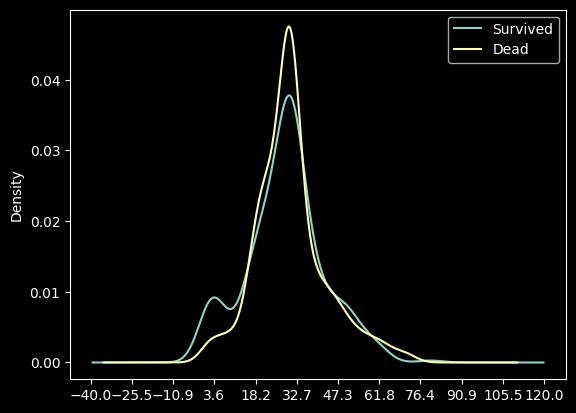

In [555]:
df[df['Survived']==1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived']==0]['Age'].plot(kind='kde',label='Dead')
plt.legend()
plt.xticks(np.linspace(-40,120,12))
plt.show()

In [556]:
df.loc[ (df['Age']>45)].groupby('Survived').size()

Survived
0    65
1    38
dtype: int64

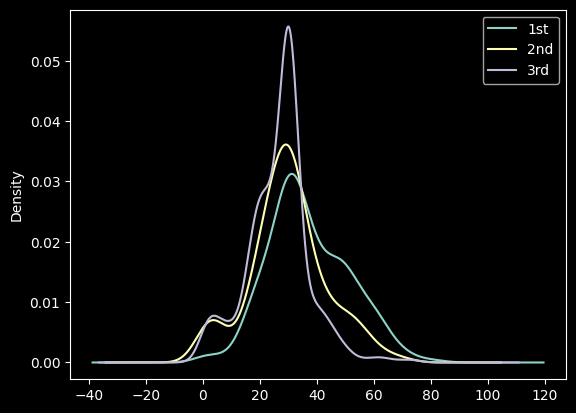

In [557]:
df[df['Pclass']==1]['Age'].plot(kind='kde',label='1st')
df[df['Pclass']==2]['Age'].plot(kind='kde',label='2nd')
df[df['Pclass']==3]['Age'].plot(kind='kde',label='3rd')
plt.legend()
plt.show()

<Axes: xlabel='Survived'>

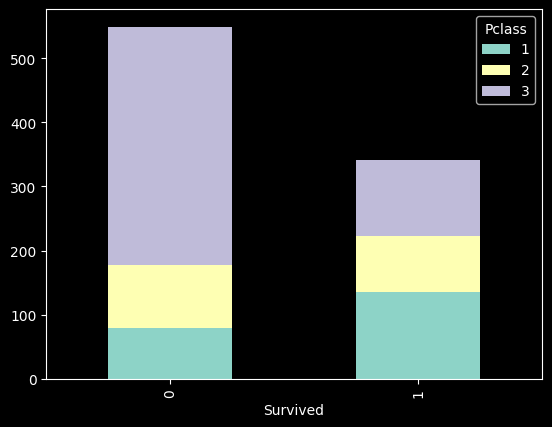

In [558]:
df.pivot_table(index='Survived',columns='Pclass',aggfunc='size').plot(kind='bar',stacked=True)

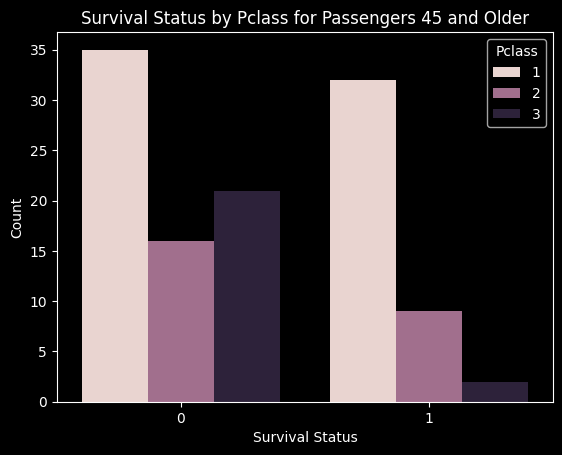

In [559]:
df_over_45 = df[df['Age'] >= 45].copy()
sns.countplot(x='Survived', hue='Pclass', data=df_over_45)
plt.title('Survival Status by Pclass for Passengers 45 and Older')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

<Axes: title={'center': 'Dead'}, xlabel='Age_Group'>

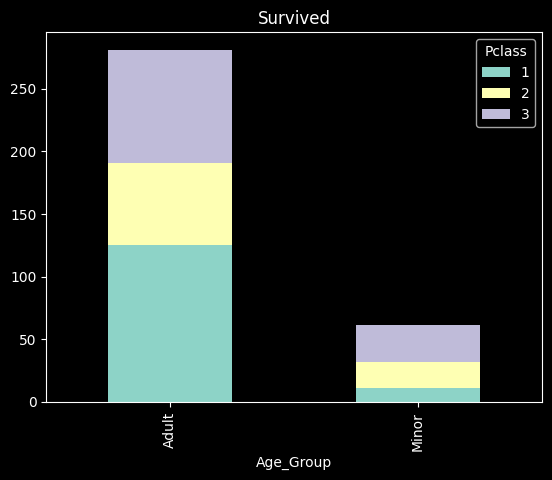

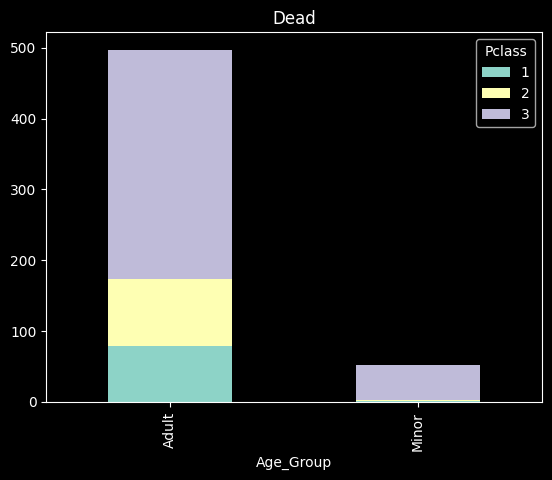

In [560]:
df[df['Survived']==1].pivot_table(index='Age_Group',columns='Pclass',aggfunc='size',observed=True).plot(kind='bar',stacked=True,title='Survived')
df[df['Survived']==0].pivot_table(index='Age_Group',columns='Pclass',aggfunc='size',observed=True).plot(kind='bar',stacked=True,title='Dead')

In [561]:
pd.crosstab(df['Embarked'],df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [562]:
df.pivot_table(index='Embarked',columns='Sex',aggfunc='size')

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


In [563]:
df.pivot_table(index='Embarked',columns='Pclass',aggfunc='size')

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [564]:
df['Family_Size'] = df['SibSp']+df['Parch']+1
def familytype(row):
    if(row['Family_Size']==1):
        return 3
    if(row['Family_Size']<5):
        return 2
    else:
        return 1
df['Family_type'] = df.apply(familytype,axis=1)

In [565]:
df['Individual Price'] = df['Fare']/df['Family_Size']
df = df.drop(columns=['Cabin','Fare'])

In [566]:
df.groupby('Pclass')['Individual Price'].mean()

Pclass
1    52.936943
2    12.698832
3     8.094756
Name: Individual Price, dtype: float64

In [567]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Age_Group,Deck,Family_Size,Family_type,Individual Price
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,Adult,M,2,2,3.62500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,Adult,C,2,2,35.64165
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,Adult,M,1,3,7.92500
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,Adult,C,2,2,26.55000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,Adult,M,1,3,8.05000


In [568]:
df['Deck'].value_counts()

Deck
M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [569]:
df['Age_Group'].value_counts()

Age_Group
Adult    778
Minor    113
Name: count, dtype: int64

In [570]:
#df['Sex'] = np.where(df['Sex']=='female',1,0)
df = pd.get_dummies(df, columns=['Sex'])
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Age_Group'] = label_encoder.fit_transform(df['Age_Group'])
deckLabels={'M':9,
'C':     8,
'B':     7,
'D':     6,
'E':     5,
'A':     4,
'F':     3,
'G':      2,
'T': 1}
df['Deck'] = df['Deck'].map(deckLabels)


In [571]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Embarked,Age_Group,Deck,Family_Size,Family_type,Individual Price,Sex_female,Sex_male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,S,0,9,2,2,3.62500,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,C,0,8,2,2,35.64165,True,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,S,0,9,1,3,7.92500,True,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,S,0,8,2,2,26.55000,True,False
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,S,0,9,1,3,8.05000,False,True


In [572]:
#freq_encoding = df['Pclass'].value_counts(normalize=False)
#df['Pclass'] = df['Pclass'].map(freq_encoding)

In [573]:
Q1 = df['Individual Price'].quantile(0.25)
Q3 = df['Individual Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Individual Price'] >= lower_bound) & (df['Individual Price'] <= upper_bound)]
df['Individual Price'].describe()

count    822.000000
mean      12.743142
std        9.971633
min        0.000000
25%        7.229200
50%        8.050000
75%       13.000000
max       47.100000
Name: Individual Price, dtype: float64

In [574]:
#df = df.drop(columns=['Sex_female','Cabin_No Cabin','Age_Group_Adult'])
#df['Age_Type'] = np.where(df['Age']<16,0,1)
df['Age_Group'] = df['Age_Group']+1
bins = [0, 10, 20, 30, 40, 50]
labels = [1, 2, 3, 4, 5]
df['Individual Price'] = pd.cut(df['Individual Price'], bins=5, labels=labels)
df = pd.get_dummies(df, columns=['Embarked'])

In [575]:
df['Title']=df['Name'].str.split(',').str[1].str.split().str[0]
df['Title'].value_counts()
def group(row):
    if(row=='Capt.' or row=='Col.' or row=='Don.' or row=='Dr.' or row=='Jonkheer.' or row=='Major.' or row=='Rev.' or row=='Sir.'):
        return 'Noble'
    if(row=='Lady.' or row=='Ms.' or row=='Miss.'):
        return 'Miss.'
    else:
        return row
df['Title'] = df['Title'].apply(group)
df = pd.get_dummies(df,columns=['Title'])
df['SibSp'] = np.where(df['SibSp']==0,0,1)
df['Parch'] = np.where(df['Parch']==0,0,1)
#df['Title'].value_counts()

In [576]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Age_Group,Deck,Family_Size,Family_type,Individual Price,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Noble
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,1,9,2,2,1,False,True,False,False,True,False,False,True,False,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,1,8,2,2,4,True,False,True,False,False,False,False,False,True,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,1,9,1,3,1,True,False,False,False,True,False,True,False,False,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,1,8,2,2,3,True,False,False,False,True,False,False,False,True,False
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,1,9,1,3,1,False,True,False,False,True,False,False,True,False,False


In [577]:
def agetype(row):
    if(row['Age']<16):
        return 1
    if(row['Age']>45):
        return 3
    else:
        return 2
#df['Age_Group'] = df.apply(agetype,axis=1)

# Conclusions:
-Most died are males, who were from 3rd class, one more observed fact is most 3rd class didn't even had cabin </br>
-1st class had most survival rate, 3rd class least, which is maybe because poor people weren't given priority to be saved </br>
-45+ age people were rich to have 1st class otherwise they would have the most death rate, because they old </br>
-Child below 16 age and females were given priority to be rescued </br>
-Most people embarked from S, and mostly 3rd class, most without cabin, so can say, S location is full of less socio-economic status people </br>
-Big families and Alone people had less survival rate which is reasonable, since hard to manage and self-dependent respectively </br>
-Most of high social status people died, don't know why?? </br>
<b> Major predictor of survival is: <b></br>
<b> Are you child? Are you rich? Are you female? If yes, you are most likely safe </b>

In [578]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Survived','Name','Ticket','Age','Family_type']),df['Survived'],test_size=0.2,random_state=2)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [579]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2000,random_state=2)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print(classification_report(y_test, y_pred))


Accuracy: 82.42%
Precision: 0.85
Recall: 0.65
F1 Score: 0.73
Confusion Matrix:
[[96  7]
 [22 40]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       103
           1       0.85      0.65      0.73        62

    accuracy                           0.82       165
   macro avg       0.83      0.79      0.80       165
weighted avg       0.83      0.82      0.82       165



In [580]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier( random_state=2)
params = { 
'max_depth':[2,4,5,7,9,11,13],
'criterion':['entropy'],
#'min_samples_split': [2, 5, 10, 20],
#'min_samples_leaf': [1, 2, 4, 10],
#'max_features': ['sqrt', 'log2', None],
#'splitter': ['best', 'random'],
#'max_leaf_nodes': [None, 10, 20, 30, 50],
#'class_weight': [None, 'balanced']
}
clf = GridSearchCV(clf,cv=5,n_jobs=-1,param_grid=params)
clf.fit(x_train, y_train)
y_pred = clf.best_estimator_.predict(x_test)
print("Best max depth: ",clf.best_params_)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print(classification_report(y_test, y_pred))

Best max depth:  {'criterion': 'entropy', 'max_depth': 4}
Accuracy: 82.42%
Precision: 0.84
Recall: 0.66
F1 Score: 0.74
Confusion Matrix:
[[95  8]
 [21 41]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       103
           1       0.84      0.66      0.74        62

    accuracy                           0.82       165
   macro avg       0.83      0.79      0.80       165
weighted avg       0.83      0.82      0.82       165



In [581]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfg = RandomForestClassifier(random_state=2,n_jobs=-1)
params = {
    'max_depth':[2,3,4,7,9,11],
    'n_estimators':[5,10,15,20],
}
rfg = GridSearchCV(rfg,param_grid=params,n_jobs=-1)
rfg.fit(x_train,y_train)
y_pred = rfg.best_estimator_.predict(x_test)
print("Best params: ",rfg.best_params_)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Best params:  {'max_depth': 4, 'n_estimators': 15}
Accuracy: 78.79%
Precision: 0.83
Recall: 0.55
F1 Score: 0.66
